<font size=6>
    Sberbank Russian Housing: PCA
</font>

# Summary
A quiick look at the filled numerical columns with PCA; this is the initial investigation without any data cleaning.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

BASE_PATH = "../../datasets/sberbank-russian-housing-market/"

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(BASE_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../../datasets/sberbank-russian-housing-market/sample_submission.csv
../../datasets/sberbank-russian-housing-market/macro.csv
../../datasets/sberbank-russian-housing-market/test.csv
../../datasets/sberbank-russian-housing-market/data_dictionary.txt
../../datasets/sberbank-russian-housing-market/train.csv
../../datasets/sberbank-russian-housing-market/sberbank-russian-housing-market.zip
../../datasets/sberbank-russian-housing-market/__MACOSX/._test.csv
../../datasets/sberbank-russian-housing-market/__MACOSX/._train.csv


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

## Load the data

In [3]:
df = pd.read_csv(BASE_PATH + 'train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [5]:
df.shape

(30471, 292)

### Characterize the missing values

In [95]:
missing = [(c, df[c].isna().mean()*100) for c in df]
missing = pd.DataFrame(missing, columns=["column_name", "percent_missing"])
missing = missing[missing.percent_missing > 0]
display(missing.sort_values("percent_missing", ascending=False))

,column_name,percent_missing
24,hospital_beds_raion,47.392603
7,build_year,44.649011
10,state,44.498047
161,cafe_sum_500_max_price_avg,43.585704
160,cafe_sum_500_min_price_avg,43.585704
162,cafe_avg_price_500,43.585704
5,max_floor,31.413475
6,material,31.413475
8,num_room,31.413475
9,kitch_sq,31.413475


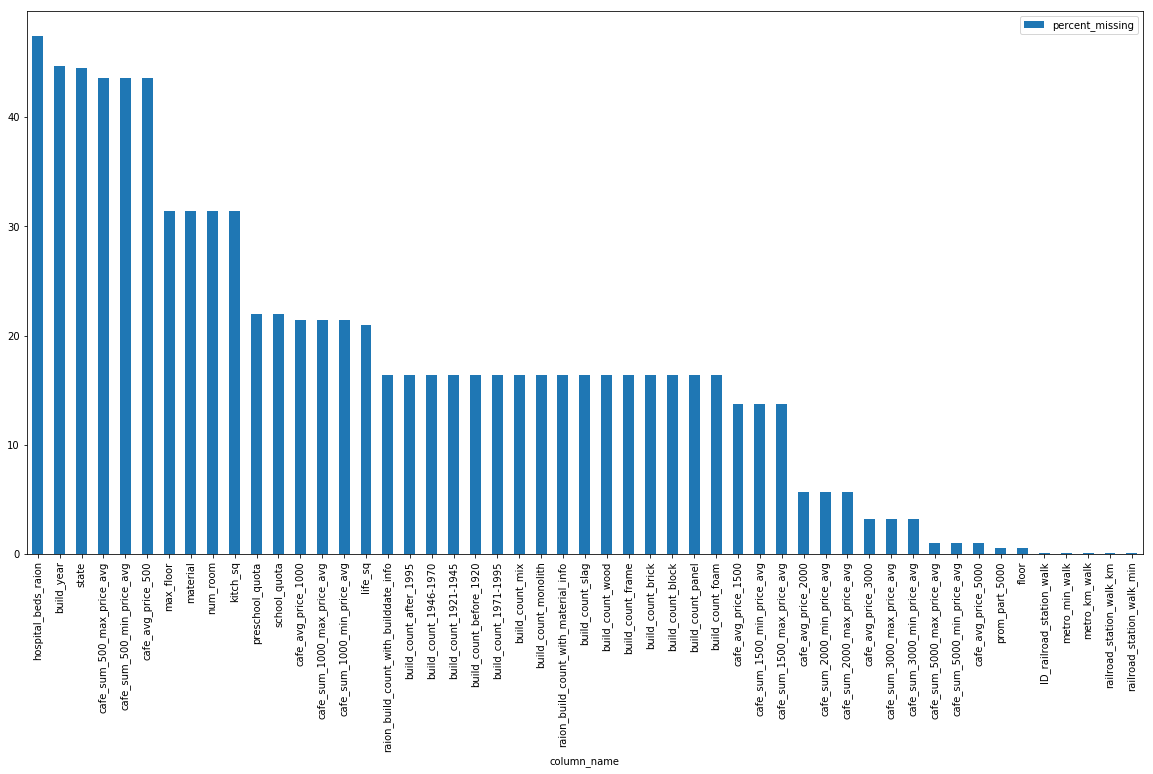

In [96]:
fig, ax = plt.subplots(1,1,figsize=[20,10])
missing.sort_values("percent_missing", ascending=False).plot.bar(x='column_name',y='percent_missing', ax=ax)

In [97]:
df.shape, missing.shape

((30471, 292), (51, 2))

In [98]:
missing_col_names = missing.column_name.values.tolist() + ['price_doc']
all_cols = df.columns.tolist()

In [99]:
all_full_cols = [item for item in all_cols if item not in missing_col_names]

In [100]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

X = df.filter(all_full_cols, axis=1).select_dtypes(include=numerics)

In [101]:
X.shape

(30471, 224)

<hr style="border: 4px dotted #aaaaaa; border-style: none none dotted; color: #fff; background-color: #fff;"/>

## With PCA

(1, 10000000000.0)

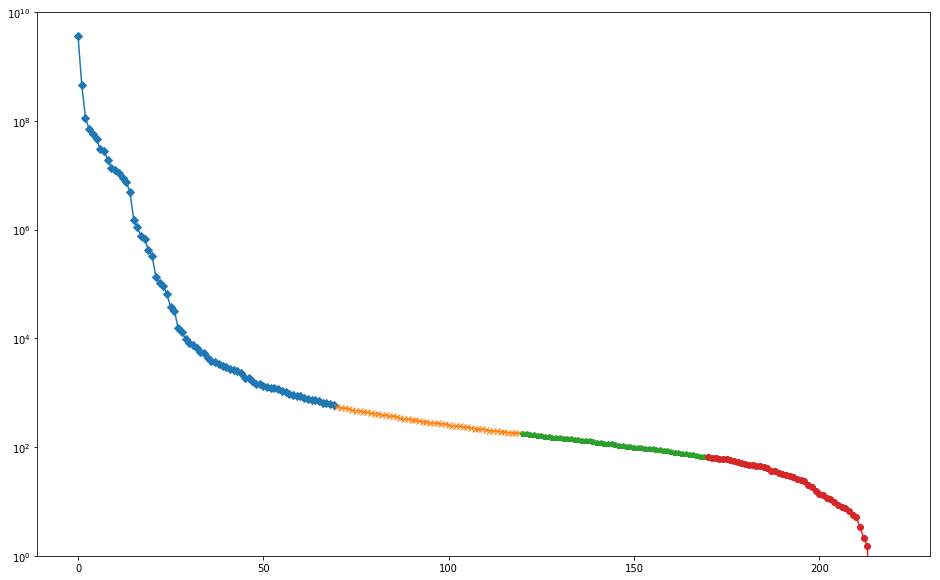

In [91]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1,1,figsize=(16,10))
markers = ['D', 'x','p', 'o']
start=0
for n,compo in enumerate([70,120,170,220]):
    # we carefully reduce dimensionality from 271 features to 250 dimensions
    pca = PCA(n_components=compo)

    X_pca = pca.fit_transform(X)
    
    stop=compo
    sing_vals = pca.singular_values_[start:stop]
    ax.plot(np.arange(start,stop,1),sing_vals, marker=markers[n])
    start=compo
plt.yscale('log')
plt.ylim(1,1e10);

**note** the data is too sparse and the differences are too large to make sense out of matrix plots - need to rescale?

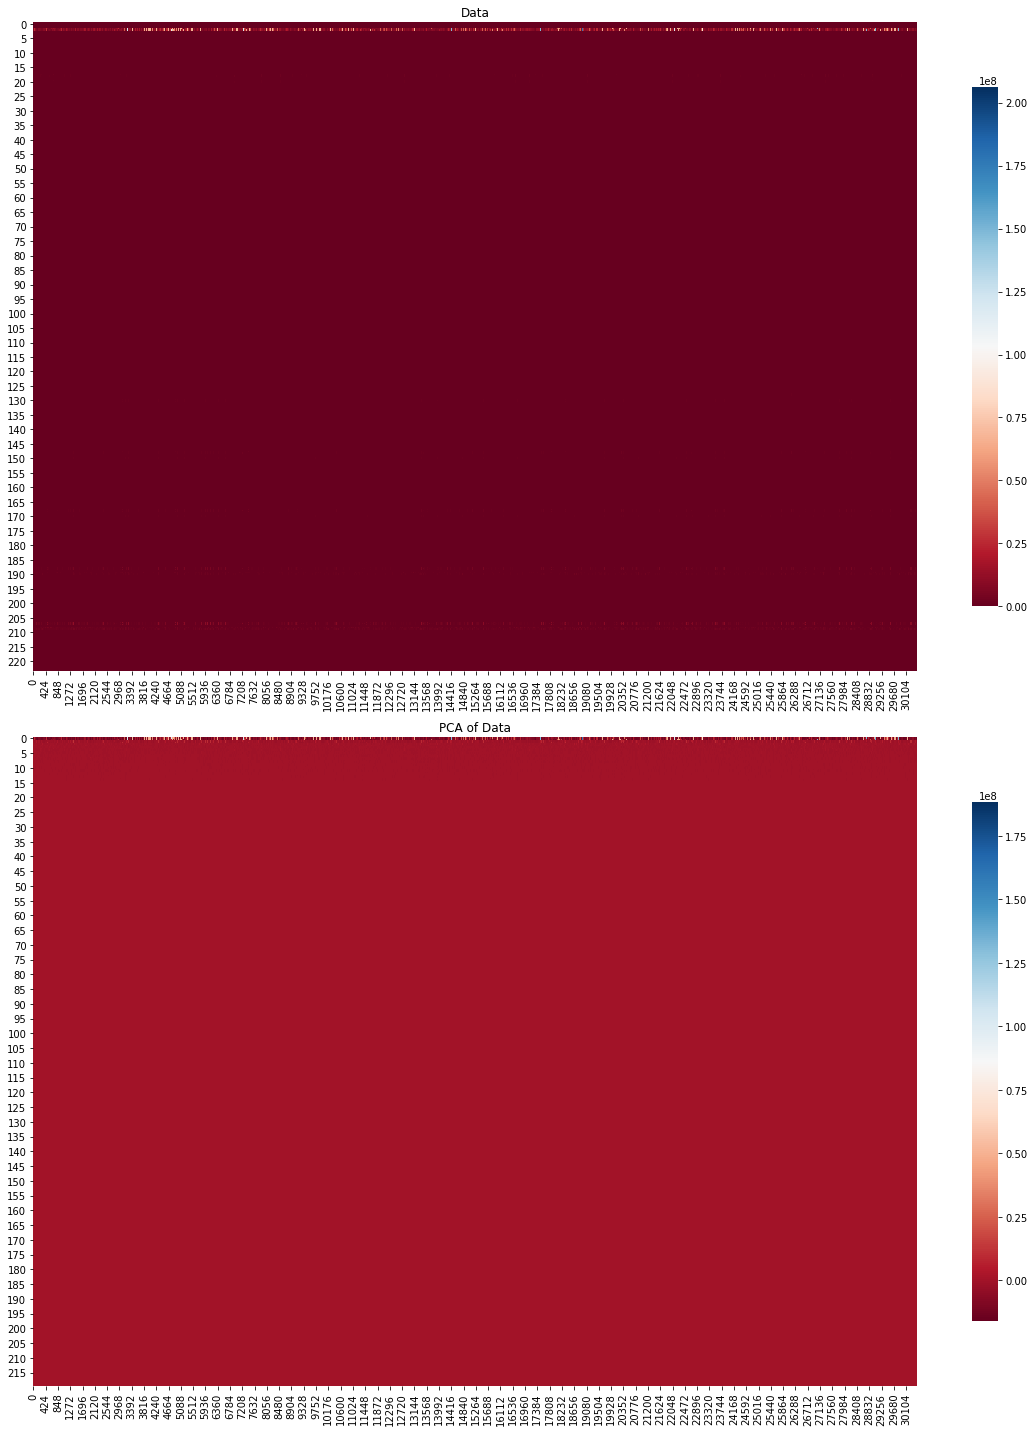

In [94]:
fig, ax = plt.subplots(2,1,figsize=(16,20))
sns.heatmap(X.values.transpose(), cmap="RdBu", square=False, cbar_kws={"shrink": .8}, ax=ax[0])
ax[0].set_title("Data")

sns.heatmap(X_pca.transpose(), cmap="RdBu", square=False, cbar_kws={"shrink": .8}, ax=ax[1])
ax[1].set_title("PCA of Data")

plt.tight_layout()
plt.show()

<hr style="border: 4px dotted #aaaaaa; border-style: none none dotted; color: #fff; background-color: #fff;"/>